# PHYS 331 - Numerical Techniques for the Sciences I
## Homework 09: Ordinary Differential Equations
### Problem 2 -  Fixed-step integrators
---
Name: *Viktorya Hunanyan*

Onyen: *vhunany*

Cell for *Problem 2* is below.


Integrator: Euler
nstep = 10, RMS Error = 0.11780776521446742


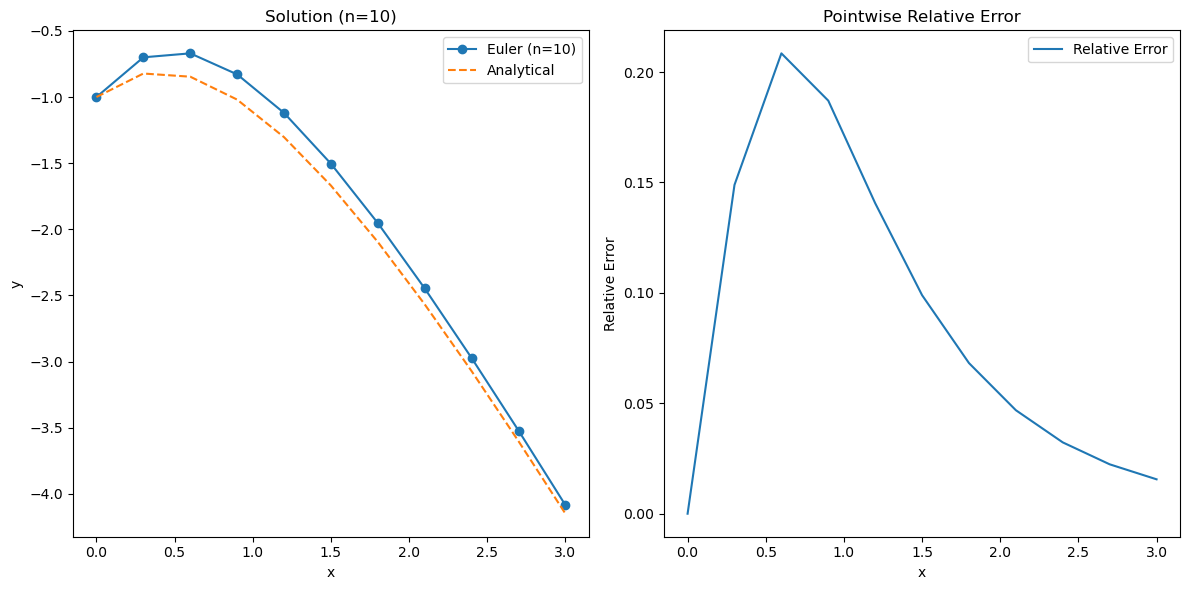

nstep = 100, RMS Error = 0.010286144666642063


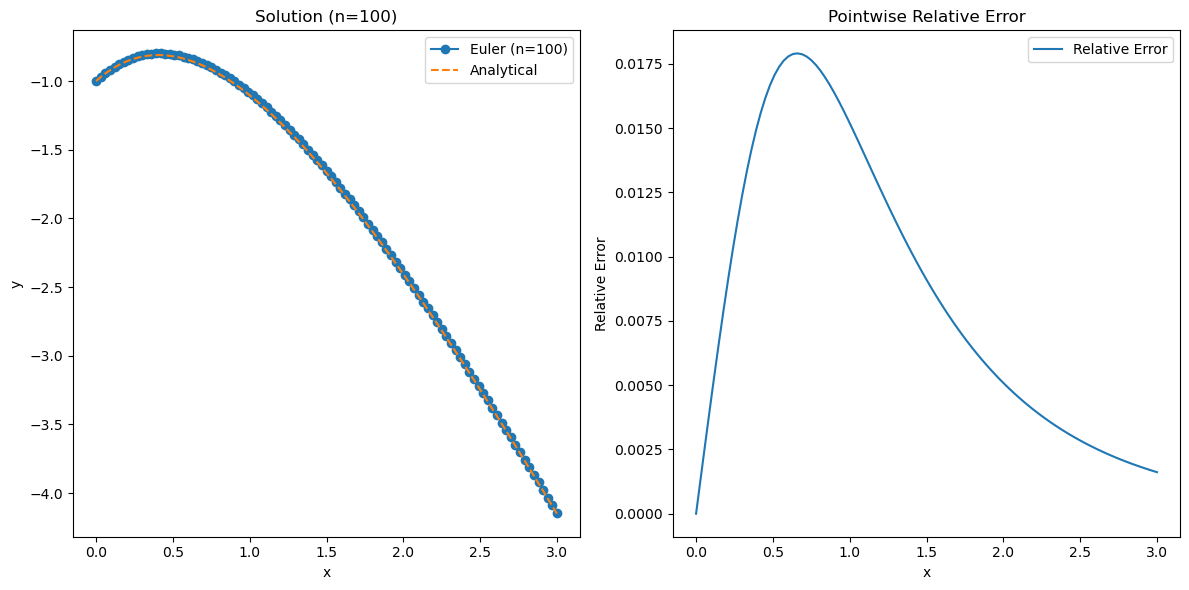

nstep = 1000, RMS Error = 0.0010162455245513288


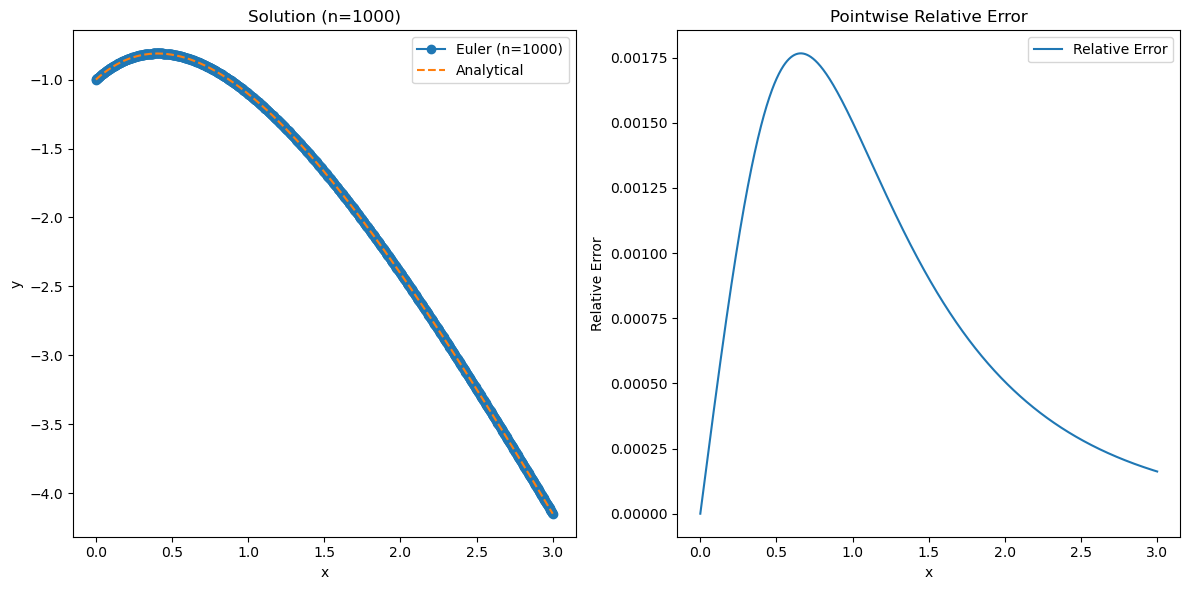

nstep = 10000, RMS Error = 0.0001015029217362622


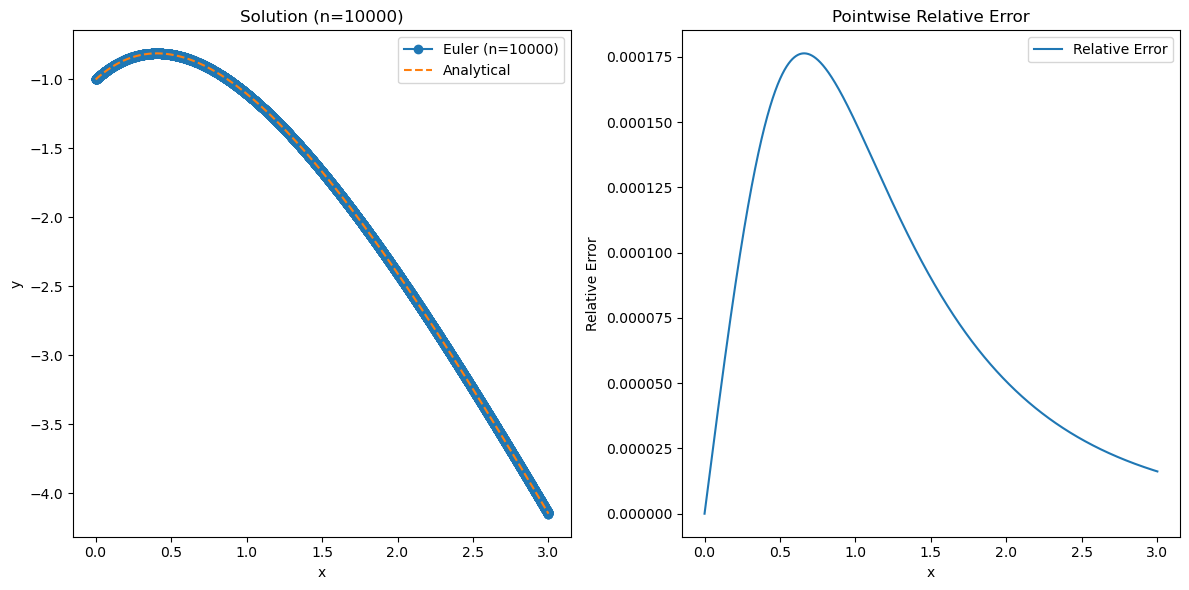


Integrator: RK2
nstep = 10, RMS Error = 0.012811348776924135


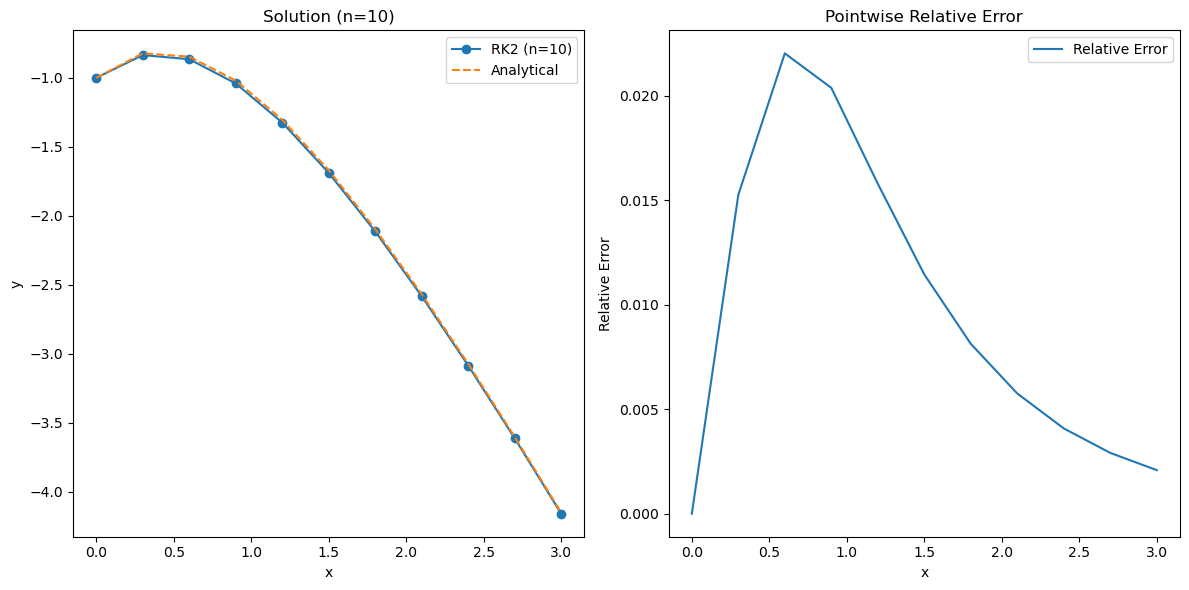

nstep = 100, RMS Error = 0.00010381406441695093


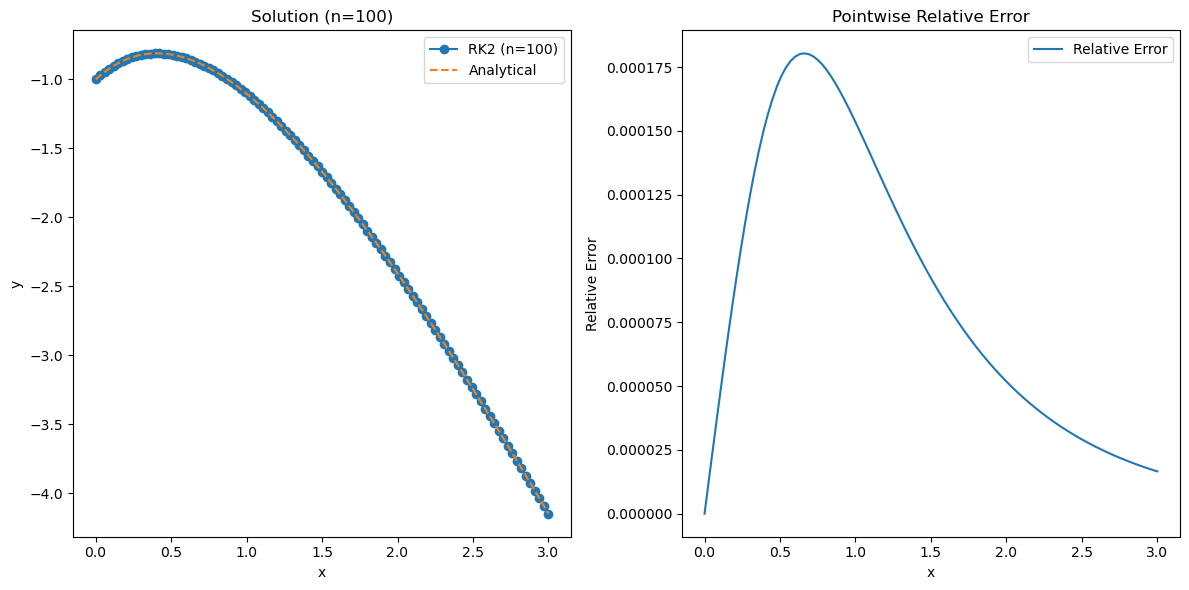

nstep = 1000, RMS Error = 1.0171877142842178e-06


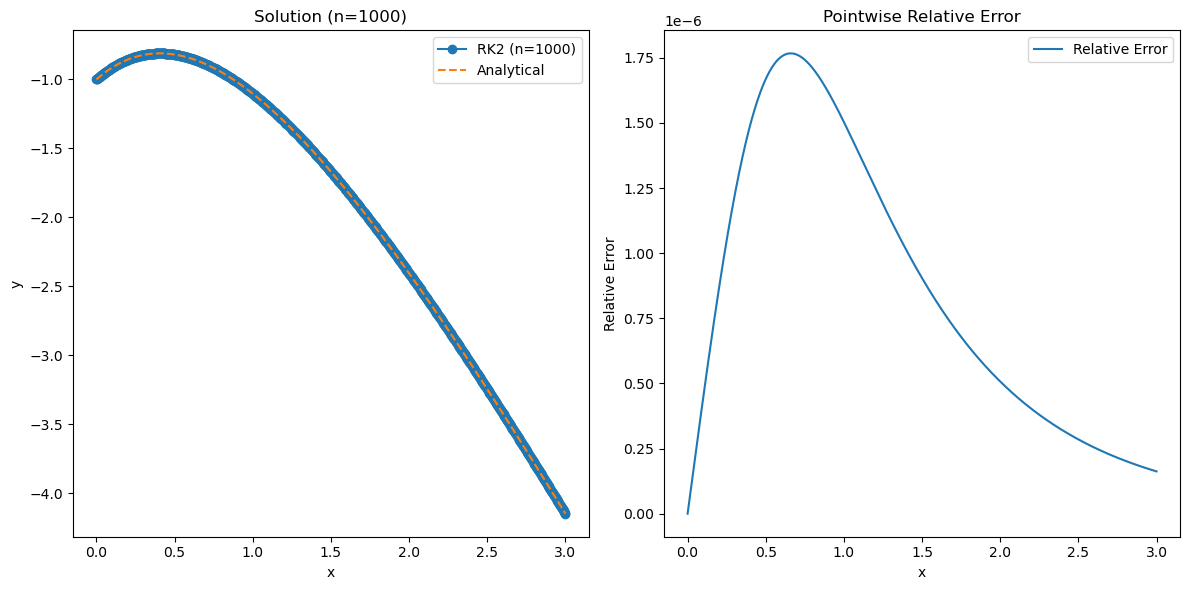

nstep = 10000, RMS Error = 1.0151239597530205e-08


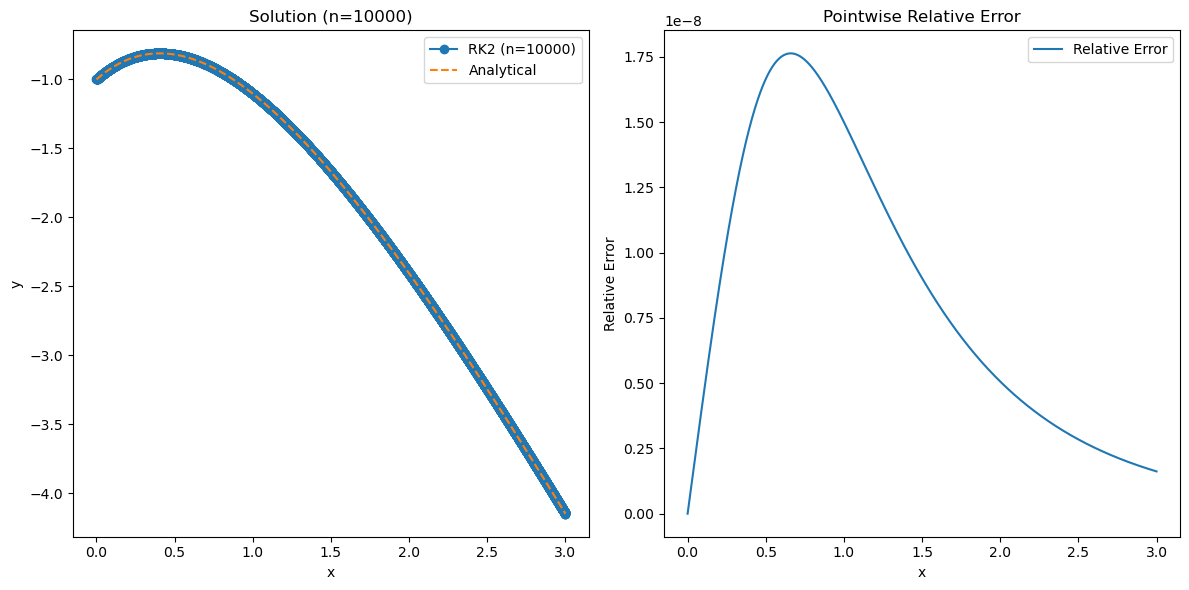


Integrator: RK4
nstep = 10, RMS Error = 5.8729115521959714e-05


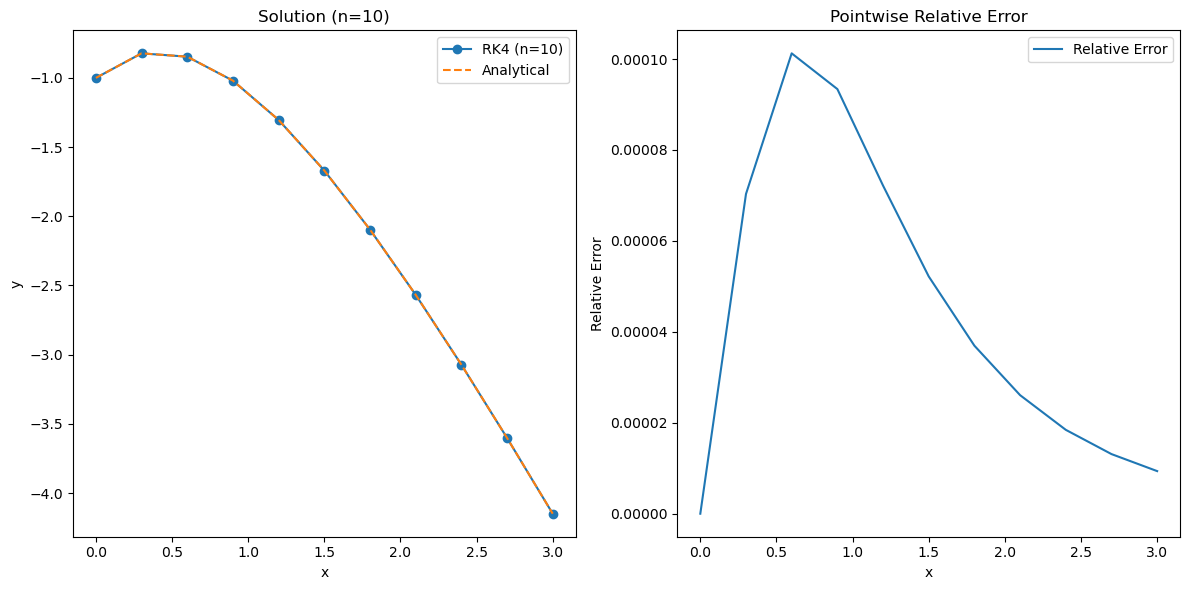

nstep = 100, RMS Error = 4.6829756649780565e-09


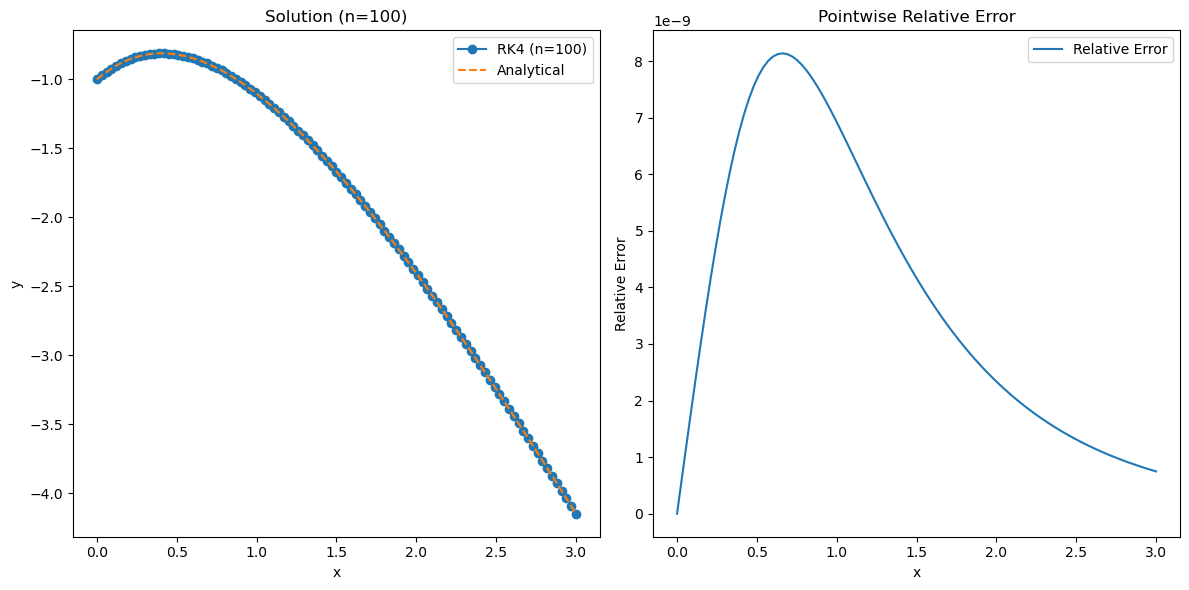

nstep = 1000, RMS Error = 4.605828348210045e-13


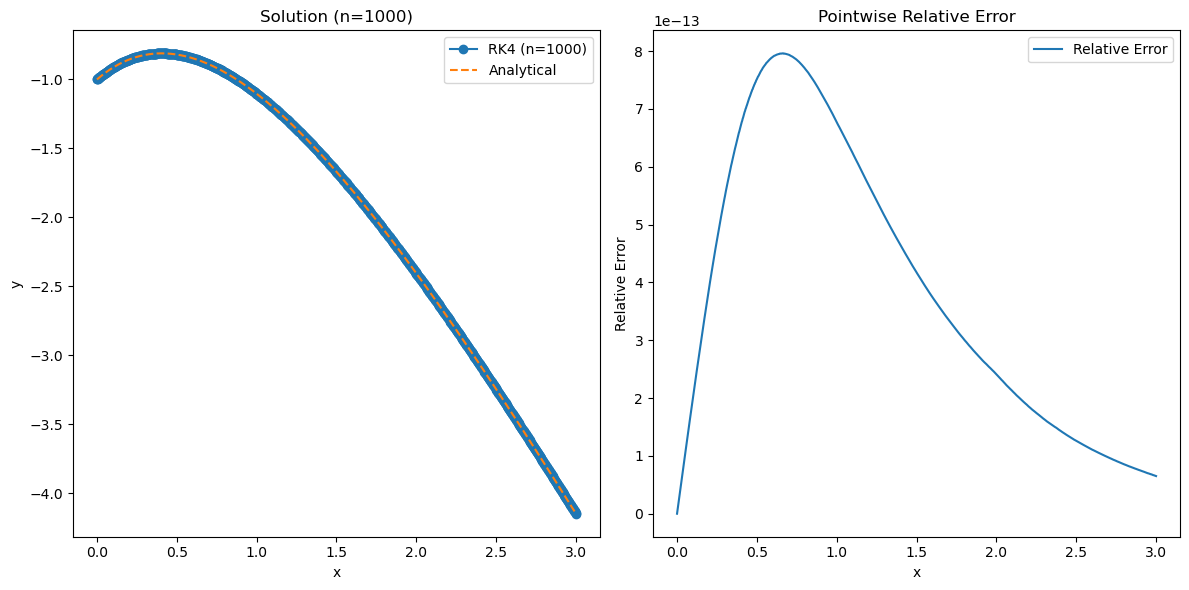

nstep = 10000, RMS Error = 6.655534472064761e-14


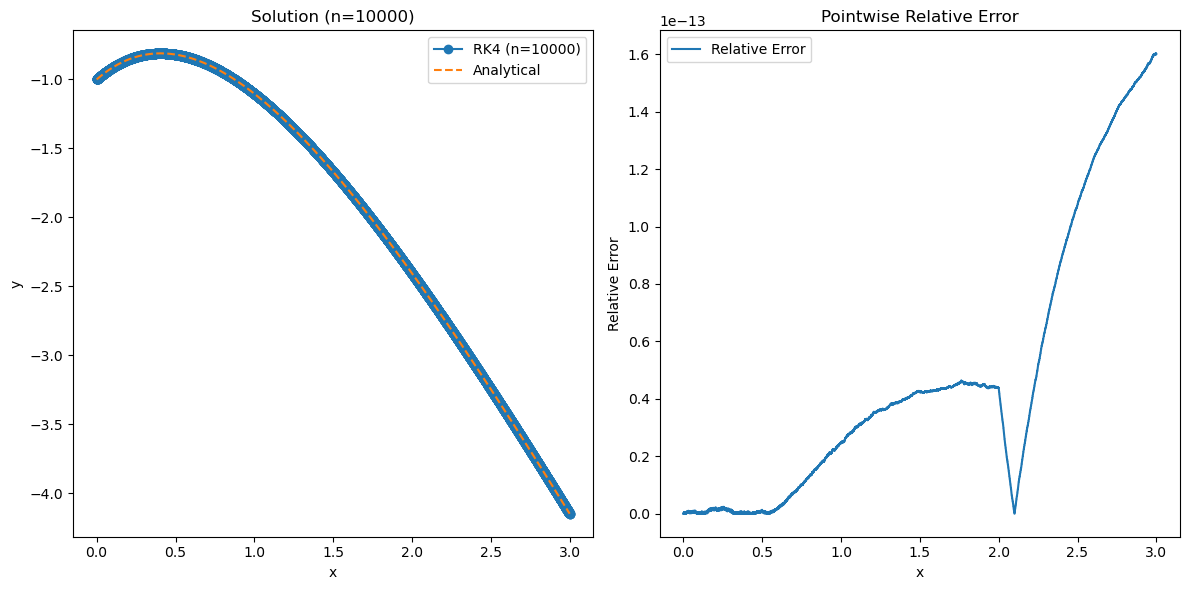

In [23]:
import numpy as np

def f(x,y):

    return(-2.0*x - y)

def eulerstep(y,f,x,h):

    """
    Advances solution by a single Euler step
    
    PARAMETERS:
    input:
        y -- initial value, scalar;
        f -- function (RHS of ODE);
        x -- starting x.
        h -- stepsize

    RETURNS:
        updated result

        See the assignment sheet for additional details about these
        function parameters.
    """

    ynew = y + f(x,y)*h
    
    return(ynew)


def rk2step(y,f,x,h):

    """
    Advances solution by a single RK2 step
    
    PARAMETERS:
    input:
        y -- initial value, scalar;
        f -- function (RHS of ODE);
        x -- starting x.
        h -- stepsize

    RETURNS:
        updated result

        See the assignment sheet for additional details about these
        function parameters.
    """
    a = 0.5
    b = 0.5
    alpha = 1.0
    beta = 1.0
    k1 = h*f(x,y)    
    k2 = h*f(x+ alpha*h, y + beta*k1)
    
    ynew = y + a*k1 + b*k2
    
    return(ynew)


def rk4step(y,f,x,h):
    """
    Advances solution by a single RK4 step
    
    PARAMETERS:
    input:
        y -- initial value, scalar;
        f -- function (RHS of ODE);
        x -- starting x.
        h -- stepsize

    RETURNS:
        updated result

        See the assignment sheet for additional details about these
        function parameters.
    """
    k1 = h * f(x, y)
    k2 = h * f(x + h / 2, y + k1 / 2)
    k3 = h * f(x + h / 2, y + k2 / 2)
    k4 = h * f(x + h, y + k3)
    
    ynew = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    return ynew


def ode_fixedstep(nstep,f,x0,y0,x1,iinteg):

    """
    Solves an ordinary differential equation
    using fixed step size.

    PARAMETERS:
    input:
        nstep  : number of steps
        f      : inline function (RHS of ODE)
        x0     : starting x.
        y0     : starting y (scalar).
        x1     : end x.
        iinteg : integrator: 0: Euler
                            1: Runge-Kutta 2nd order
                            2: Runge-Kutta 4th order
    output:
        x      : positions of n+1 steps
        y      : (nstep+1,1) vector of resulting y's
    
     comment  : Determine dx from the given stepsize and the integration
                boundaries. You will have to provide the integrators
                through functions eulerstep, rk2step, rk4step.
                Each of them does just one single step.

    """

    h = (x1 - x0) / nstep  # step size
    x = np.zeros(nstep + 1)
    y = np.zeros(nstep + 1)

    x[0], y[0] = x0, y0  # initialize starting values

    # slecect the stepping method
    if iinteg == 0:
        step_func = eulerstep
    elif iinteg == 1:
        step_func = rk2step
    elif iinteg == 2:
        step_func = rk4step
    else:
        raise ValueError("Invalid integrator type")

    for i in range(nstep):
        x[i + 1] = x[i] + h
        y[i + 1] = step_func(y[i], f, x[i], h)

    return x, y


def main():
    import matplotlib.pyplot as plt
    
    nsteps = [10, 100, 1000, 10000]  # num of steps for each test
    x0 = 0.0
    y0 = -1.0
    x1 = 3.0
    true_solution = lambda x: -2 * x + 2 - 3 * np.exp(-x)

    integrators = ["Euler", "RK2", "RK4"]
    
    for iinteg, integ_name in enumerate(integrators):
        print(f"\nIntegrator: {integ_name}")
        for nstep in nsteps:
            # Solve the ODE
            x, y = ode_fixedstep(nstep, f, x0, y0, x1, iinteg)
            y_true = true_solution(x)

            # Compute pointwise relative errors
            e_i = (y - y_true) / y_true

            # Compute RMS error
            e_rms = np.sqrt(np.sum(e_i**2) / nstep)
            print(f"nstep = {nstep}, RMS Error = {e_rms}")

            # Plot results
            plt.figure(figsize=(12, 6))

            # Plot solutions
            plt.subplot(1, 2, 1)
            plt.plot(x, y, label=f"{integ_name} (n={nstep})", marker='o')
            plt.plot(x, y_true, label="Analytical", linestyle='dashed')
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title(f"Solution (n={nstep})")
            plt.legend()

            # Plot relative error
            plt.subplot(1, 2, 2)
            plt.plot(x, np.abs(e_i), label="Relative Error")
            plt.xlabel("x")
            plt.ylabel("Relative Error")
            plt.title("Pointwise Relative Error")
            plt.legend()

            plt.tight_layout()
            plt.show()   

main()  # Don't delete the call to main() by mistake!

The results from the numerical methods clearly show how accuracy improves as the number of steps increases, with noticeable differences between the Euler method, RK2, and RK4 integrators. The Euler method, being the simplest, has errors that reduce in a straight line with the step size. It gets more accurate with more steps, but it takes a lot of steps to get decent precision. For example, with 10 steps, the RMS error is 0.1178, which drops to 0.0103 at 100 steps, 0.0010 at 1000 steps, and 0.0001 at 10000 steps. This is expected, but it shows that Euler isn’t great if you need very precise results.

RK2, which is a step up from Euler, performs much better. Its error decreases faster because it improves accuracy quadratically with the step size. For instance, the RMS error is 0.0128 for 10 steps, already much smaller than Euler’s. With 100 steps, the error drops to 0.0001, then to 10^-6 at 1000 steps, and 10^-8 at 10000 steps. This makes RK2 a solid option if you want a balance between speed and accuracy.

Then there’s RK4, which really shines. It’s much more accurate, and its error drops even faster, following a quartic improvement with step size. For just 10 steps, the RMS error is already as small as 5.87*10^-5. At 100 steps, it’s 4.68*10^-9, at 1000 steps, 4.60*10^-13, and at 10000 steps, it’s 6.66*10^-14, practically at machine precision. RK4 does require more work per step since it calculates the function four times, but it makes up for it by needing fewer steps overall for highly accurate results.

In general, the error trends across the integrators align with theoretical expectations. Euler shows linear error improvement, while RK2 and RK4 exhibit quadratic and quartic improvements, respectively. Although RK4 is computationally more expensive per step because it requires four evaluations of the function, its rapid convergence makes it the most efficient overall. For problems requiring rough estimates or where computational resources are limited, Euler or RK2 may suffice. However, for applications requiring high precision, RK4 is the better choice, as it minimizes the total number of steps required for convergence. 
